#### Contribution of group members

All members peformed joint work  and thus contributed equally .

Tanya D Vyas (23510124) -   25%

Tarun Kumar (23510125) -      25 %

Tharasinh Katravath (23510126) -      25%

Tiyasha Khatua (23510128) -    25 %

# Plotting of coulomb potential with an additional term for the effective potential

In [1]:
import matplotlib.pyplot as plt  # Importing matplotlib library for plotting
import numpy as np  # Importing numpy library for numerical operations

In [2]:

# Coulomb potential with an additional term for the effective potential
def Veff(x, L, e):
    potential = L*(L+1)/(2*x*x) - 1/(x**(1+e))
    return potential

xL = 0.1  # Starting value for radial distance
xR = 20.0  # Ending value for radial distance
num_points = 1000  # Number of points for plotting
e_values = [0.0, 0.01, 0.05, 0.1]  # List of eccentricity values
L_values = [0, 1, 2]  # List of angular momentum quantum numbers



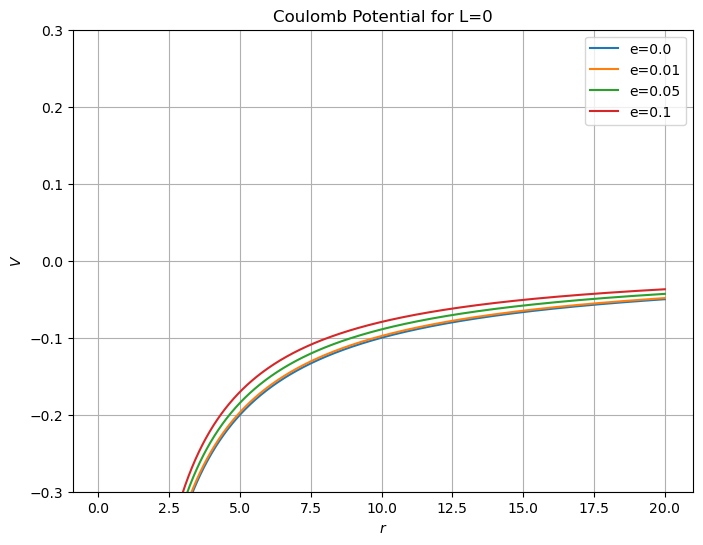

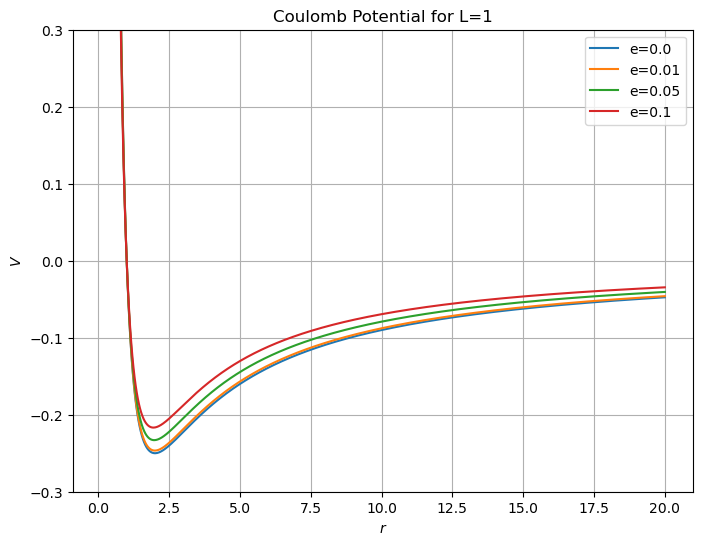

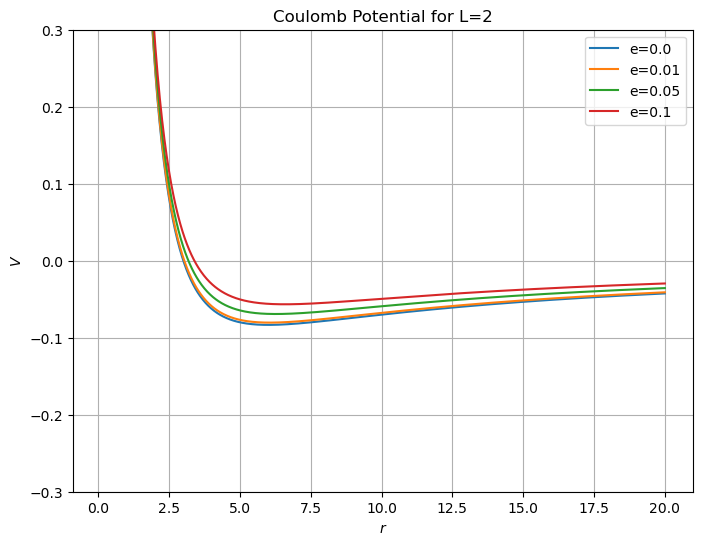

In [3]:
# Looping over different angular momentum quantum numbers
for L in L_values:
    # Creating a new figure for each L value
    plt.figure(figsize=(8, 6))
    
    # Looping over different eccentricity values for each L value
    for e in e_values:
        # Generating radial distance values
        r = np.linspace(xL, xR, num_points)
        
        # Plotting the effective potential for the current combination of L and e
        plt.plot(r, Veff(r, L, e), label=f'e={e}')
    
    # Setting y-axis limits
    plt.ylim(-0.3, 0.3)
    
    # Labeling x and y axes
    plt.xlabel(r'$r$')
    plt.ylabel(r'$V$')
    
    # Setting the title of the plot
    plt.title(f'Coulomb Potential for L={L}')
    
    # Adding legend to the plot
    plt.legend()
    
    # Turning on the grid
    plt.grid(True)
    
    # Displaying the plot
    plt.show()


## Comment on how the use of atomic units simplifies the representation of the potential above when the TISE is a-dimensionalized.

 Time dependent Schrodinger equation is simplified by use of atomic units in various ways. Scaling lengths in atomic units to the Bohr radius $ (a_0)$, energies to the Hartree energy $(E_h)$, and masses to the electron mass$(⁬m_e)$. The electron charge (e), the decreased Planck constant (ℏ), and the permittivity of open space $(ε_0)$ are all practically made equal to one by this scaling. The potential V(r) in atomic units becomes dimensionless as a result.
 
For this case where $V(r)=\frac{Z}{r^{1+e}}$ , we divide the potential by Hartree energy $ E_h $ to make it dimensionless where $E_h=1$ in atomic units. So V(r) takes the form as below

$V(r)=\frac{Z}{{E_h}{r^{1+e}}}$ 

This makes computations simpler by doing away with the need to carry around units or conversion factors.The potential term is dimensionless after the dimensionalization process, which makes the TDSE easier to understand. This simplification supports the TDSE solution using both computational and analytical methods.


# Plotting the eneregy-level diagram for different value of epsilon

In [20]:
import matplotlib.pyplot as plt  # Importing matplotlib library for plotting
import numpy as np  # Importing numpy library for numerical operations
from scipy.optimize import bisect  # Importing bisect function from scipy.optimize module


In [26]:
def Veff(r, L, mass, e):
    """
    Function to calculate the modified effective potential energy.

    Parameters:
        r (float): Radial distance.
        L (int): Angular momentum quantum number.
        mass (float): Particle's mass.
        e (float): Eccentricity.

    Returns:
        float: Modified effective potential energy.
    """
    # Modified effective potential energy
    return (L*(L+1)/(2*mass*r*r) - 1/r**(1+e))

In [27]:
def f(r, E, L, mass, e):
    """
    Modified Schrodinger equation in Numerov form.

    Parameters:
        r (float): Radial distance.
        E (float): Energy.
        L (int): Angular momentum quantum number.
        mass (float): Particle's mass.
        e (float): Eccentricity.

    Returns:
        float: Modified Schrodinger equation value.
    """
    return 2*mass*(E - Veff(r, L, mass, e))

In [28]:
def numerov(f, u, n, x, h, E, L, mass, e):
    """
    Modified Numerov integrator for u'' + f(x)u = 0.

    Parameters:
        f (function): Function representing the modified Schrodinger equation.
        u (list): List containing initial values.
        n (int): Number of steps.
        x (float): Initial position.
        h (float): Step size.
        E (float): Energy.
        L (int): Angular momentum quantum number.
        mass (float): Particle's mass.
        e (float): Eccentricity.

    Returns:
        list: List of updated values.
        int: Number of nodes.
    """
    nodes, c = 0, h*h/12.
    f0, f1 = 0., f(x+h, E, L, mass, e)
    for i in range(n):
        x += h
        f2 = f(x+h, E, L, mass, e)
        u.append((2*(1-5*c*f1)*u[i+1] - (1+c*f0)*u[i])/(1+c*f2))
        f0, f1 = f1, f2
        if (u[-1]*u[-2] < 0.0): nodes += 1
    return u, nodes

In [29]:
def shoot(En, L, mass, xL, xR, M, N, e):
    """
    Function to determine eigenvalues using shooting method.

    Parameters:
        En (float): Initial energy guess.
        L (int): Angular momentum quantum number.
        mass (float): Particle's mass.
        xL (float): Left boundary.
        xR (float): Right boundary.
        M (int): Number of points to integrate forward.
        N (int): Total number of points.
        e (float): Eccentricity.

    Returns:
        float: Result of the shooting method.
    """
    global E
    E, c, xm = En, (h*h)/6., xL + M*h
    wfup, nup = numerov(f, [0,.1], M, xL, h, E, L, mass, e)
    wfdn, ndn = numerov(f, [0,.1], N-M, xR, -h, E, L, mass, e)
    dup = ((1+c*f(xm+h, E, L, mass, e))*wfup[-1] - (1+c*f(xm-h, E, L, mass, e))*wfup[-3])/(h+h)
    ddn = ((1+c*f(xm+h, E, L, mass, e))*wfdn[-3] - (1+c*f(xm-h, E, L, mass, e))*wfdn[-1])/(h+h)
    return dup*wfdn[-2] - wfup[-2]*ddn


In [30]:
# Parameters and initial values
xL, xR, N = 0., 120., 2200
h, mass = (xR-xL)/N, 1.0
Lmax, EL, M = 4, [], 100
Estart, dE = -0.5/np.arange(1, Lmax+1)**2 - 0.1, 0.001
e_values = [0.0, 0.01, 0.05, 0.1]

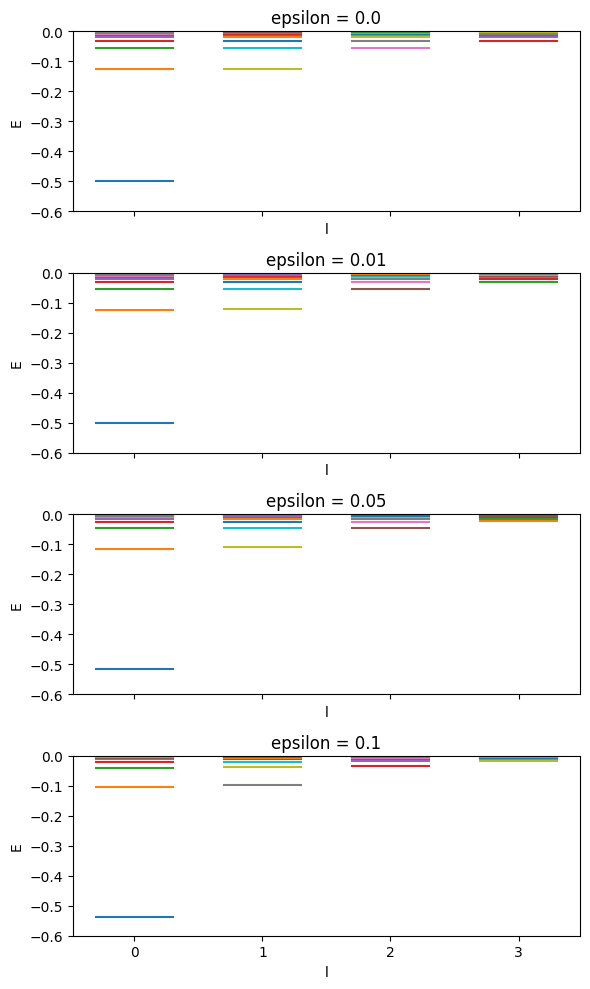

In [33]:
# Create subplots
fig, axs = plt.subplots(len(e_values), figsize=(6,10), sharex=True, sharey=True)

# Iterate over different eccentricity values
for idx, e in enumerate(e_values):
    EL = []  # Empty the list for each value of e
    for L in range(Lmax):
        n, E1, Ea = L+1, Estart[L], []
        while (E1 < -4*dE):
            E1 += dE
            if (shoot(E1, L, mass, xL, xR, M, N, e)*shoot(E1 + dE, L, mass, xL, xR, M, N, e) > 0): continue
            E = bisect(shoot, E1, E1 + dE, args=(L, mass, xL, xR, M, N, e), xtol=1e-8)
            Ea.append(E)
        wfup, nup = numerov(f, [0,.1], M-1, xL, h, E, L, mass, e)
        wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h, E, L, mass, e)
        psix = np.concatenate((wfup[:-1], wfdn[::-1]))
        psix[M:] *= wfup[-1]/wfdn[-1]
        n += 1
        EL.append(Ea)
    
    # Plot the energy levels for the current value of e
    for L in range(Lmax):
        for i in range(len(EL[L])):
            axs[idx].plot([L-0.3, L+0.3], [EL[L][i]]*2, label=f"e={e_values[idx]}")
            axs[idx].set_title(f'epsilon = {e_values[idx]}')
    axs[idx].set_xlabel('l')
    axs[idx].set_ylabel('E')
    axs[idx].set_ylim(-0.6, 0)
    axs[idx].set_xticks(range(Lmax))

plt.tight_layout()
plt.show()


## Compute the energy-level diagram as shown in Figure 9.11 in Wang’s textbook . Compare with the hydrogen atom (Z = 1), and summarise the similarities and differences.


Similarities : 

Both diagrams utilize the same y-axis scale, allowing for a direct comparison of the energy levels between them.

Negative energy levels are depicted in both diagrams, following the convention in quantum mechanics. The ground state, which has the lowest energy, is represented by the most negative value.

The 1s state, denoted by n = 1 and l = 0, is positioned at the bottom in both diagrams. This signifies the most stable configuration for the electron in hydrogen.

Higher energy levels for higher principal quantum numbers (n) are shown in both diagrams. The energy levels for n = 2, 3, and so on progressively increase on the y-axis, indicating greater energy compared to the 1s state.

Key Differences:

The primary distinction between the two diagrams lies in the energy level of the 2s state and higher states. In the left diagram (labeled "-1/r"), which represents a typical hydrogen atom, the 2s state possesses slightly higher energy than the 1s state.

However, in the right diagram (labeled "modified potential"), the 2s state and other higher energy levels are significantly elevated compared to the normal hydrogen atom. This is the crucial effect of the modified potential, as it alters the energy landscape for the electron, making higher energy states even more prominent.

Contradicting to higher levels , 1s level of Hydrogen atom is higher than modified potential .

# Plotting the radial wavefunction

In [34]:
import matplotlib.pyplot as plt  # Importing matplotlib library for plotting
import numpy as np  # Importing numpy library for numerical operations
from scipy.optimize import bisect  # Importing bisect function from scipy.optimize module


In [35]:
def Veff(x, L):
    """
    Function to calculate the effective potential energy.

    Parameters:
        x (float): Radial distance.
        L (int): Angular momentum quantum number.

    Returns:
        float: Effective potential energy.
    """
    potential = L*(L+1)/(2*x*x) - 1/x
    return potential

In [36]:
def f(x):
    """
    Function representing the modified Schrodinger equation.

    Parameters:
        x (float): Radial distance.

    Returns:
        float: Value of the modified Schrodinger equation.
    """
    global E
    return 2*(E - V(x))

In [68]:
def numerov1(f, x, dx):
    """
    Modified Numerov integrator for u'' + f(x)u = 0.

    Parameters:
        f (function): Function representing the modified Schrodinger equation.
        x (ndarray): Array containing radial distances.
        dx (float): Step size.

    Returns:
        ndarray: Array of updated values.
    """
    psi = np.zeros(len(x))
    psi[0], psi[1] = 0., dx
    
    c = dx*dx/12
    f0, f1 = f(x[0]), f(x[1])
    for i in range(len(x)-2):   
        f2 = f(x[i+2])
        psi[i+2] = (2.*psi[i+1]*(1 - 5*c*f1) - psi[i]*(1 + c*f0))/(1 + c*f2)
        f0, f1 = f1, f2

    return psi


In [73]:
def solveTISE(En, xL, xR, xm, dx, V):
    """
    Function to solve the Time Independent Schrodinger Equation.

    Parameters:
        En (float): Energy guess.
        xL (float): Left boundary.
        xR (float): Right boundary.
        xm (float): Midpoint.
        dx (float): Step size.
        V (function): Function representing the potential.

    Returns:
        tuple: Tuple containing left and right solutions.
    """
    global E
    E = En
    # Left solution
    x1 = np.round(np.arange(xL, xm + 2*dx, dx), 10)
    wfup = numerov1(f, x1, dx)

    # Right solution
    x2 = np.flipud(np.round(np.arange(xm-dx, xR+dx, dx), 12))
    wfdn = numerov1(f, x2, -dx)

    return x1, wfup, x2, wfdn


In [74]:
@np.vectorize
def juncCondn(En):
    """
    Function to apply junction condition and find eigenvalues.

    Parameters:
        En (float): Energy guess.

    Returns:
        float: Result of the junction condition.
    """
    xL = 1e-6
    xR = 30
    xm = 1e-3
    dx = 1./200
    
    E = En

    x1, wfup, x2, wfdn = solveTISE(E, xL, xR, xm, dx, Veff)

    # Left and Right derivatives at xm using Eqn. 9.60 of Wang's book
    c = dx*dx/12
    dUp = ((1 + c*f(xm+dx))*wfup[-1] - (1 + c*f(xm-dx))*wfup[-3]) /(2.*dx)
    dDn = ((1 + c*f(xm+dx))*wfdn[-3] - (1 + c*f(xm-dx))*wfdn[-1]) /(2.*dx)

    return (dUp*wfdn[-2] - dDn*wfup[-2])


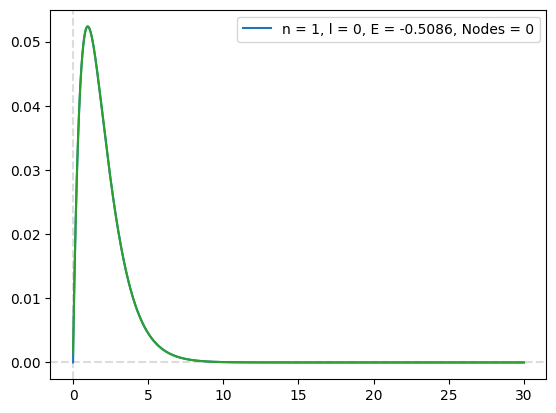

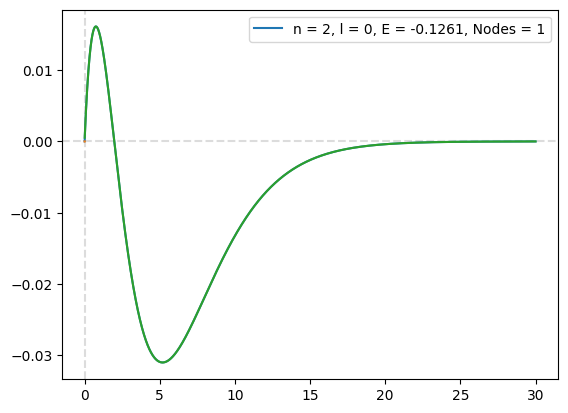

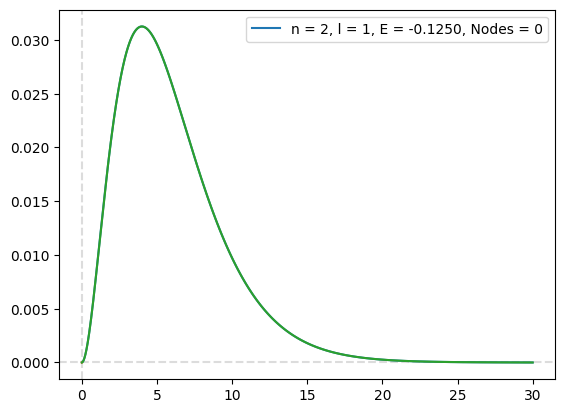

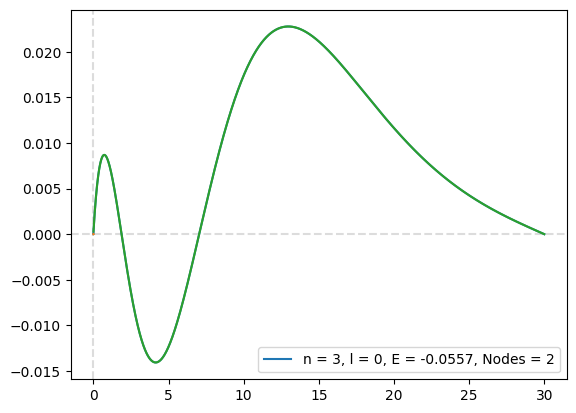

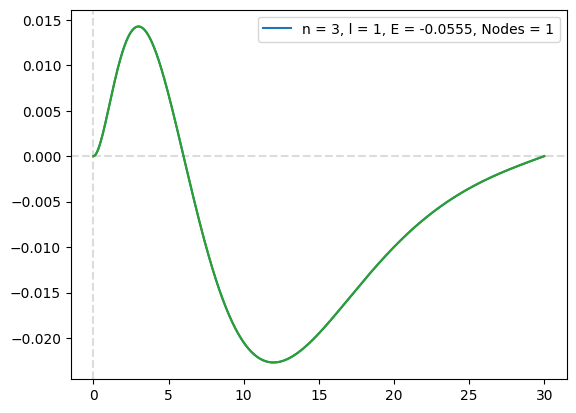

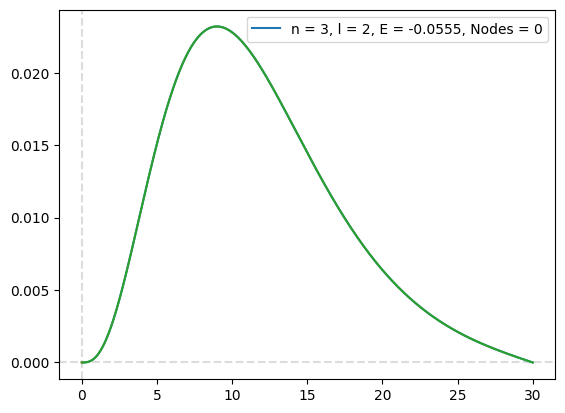

In [75]:
# Define the quantum numbers n and l
n_values = [1, 2, 3]
l_values = [0, 1, 2]

# Main loop to find eigenvalues and plot wave functions
for n in n_values:
    for l in l_values:
        if n > l :  # The condition n > l must be satisfied
            V = lambda x: Veff(x, l)
            jc = []
            En = []
            for E in np.arange(-1, 0, .01):
                En.append(E)
                jc.append(juncCondn(E))
            
            jc = np.asarray(jc)
            En = np.asarray(En)
            idx = np.where(jc[:-1] * jc[1:] < 0)[0] + 1
            EigValues = np.zeros(len(idx))
             
            for j in range(len(idx)):
                a = En[idx[j]-1]
                b = En[idx[j]+1]
                EigValues[j] = bisect(lambda E: juncCondn(E), a, b)
                
                # Plotting after collecting data
                xL, xR, xm, dx = 1e-6, 30, 1e-3, 1./200
                x1, wfup, x2, wfdn = solveTISE(EigValues[j], xL, xR, xm, dx, Veff)
                x = np.hstack((x1[:-1], np.flipud(x2[:-2])))
                psi = np.hstack((wfup[:-1], (-1)**(j+1) * np.flipud(wfdn[:-2])))
                
                # Count the number of nodes
                num_nodes = 0
                for i in range(1, len(psi)):
                    if psi[i-1] * psi[i] < 0:
                        num_nodes += 1
                
                # Check if the number of nodes is equal to n-l-1
                if num_nodes == n-l-1:
                    norm = np.linalg.norm(psi)

                    plt.axhline(0, ls='--', c='gainsboro')
                    plt.axvline(0, ls='--', c='gainsboro')

                    plt.plot(x, psi/np.linalg.norm(psi), label='n = %d, l = %d, E = %.4f, Nodes = %d'%(n, l, EigValues[j], num_nodes))
                    plt.plot(x1[:-1], wfup[:-1]/norm)
                    plt.plot(np.flipud(x2[:-2]), (-1)**(j+1) * np.flipud(wfdn[:-2])/norm)

                    plt.legend()
                    plt.show()


## Explain why all states are higher than hydrogen except 1 state.

Here the modified potential $ V=\frac{1}{r^{1.1}} $\
The power law's Coulomb potential and this potential differ somewhat. When the Time-Independent Schrödinger Equation (TISE) is a-dimensionalized, the representation of the potential is made simpler by the use of atomic units. 

The energy levels in the modified potential differ from those of the hydrogen atom because of the altered power law. In particular, for all states other than the 1s state, the energy levels of the modified potential are larger than those of the hydrogen atom. This is because, in comparison to the hydrogen atom, the effective nuclear charge in the modified potential diminishes more quickly with distance, resulting in weaker binding and higher energy levels. 



## From the radial wavefunction $ R_{nl} $ check that the number of nodes for a given state is equal to n-l-1 which is zero for circular states such as 3d. Does this seem paradoxial to the to the notion we have developed so far: the k-th excited state should have k nodes? Explain

If we calculate the number no nodes from the radial wavefunction $(R_{nl})$ then we get the number of nodes is n-l-1. This is called number of radial nodes. For 3d states n = 3, l = 2 so the number of radial nodes is zero. But the total nodes of a states depends on both radial wavefunction and angular wavefunction. Because a total wavefunction contains both radial and  angular wavefunction. If we calculate the number of nodes from the angular wavefunction $(Y_{lm})$ then we get the number of nodes is l. This is called angular nodes. So $$ total\space number\space of\space nodes\space = number\space of\space radial\space nodes\space + number\space of\space angular\space nodes $$
$$ total\space number\space of\space nodes\space = n-l-1+l\space = n-1$$

Now if we consider the k-th excited states then we can write that k-th excited state = n-1 state. Above we showed that the total number of nodes of n state is n-1 i.e k. So we can say that the k-th excited state should have k nodes.\
For example we consider 3d state. This is 2nd excited state. The total number of node of this state is n-1 = 3-1 =2. So number of excited state and number of node are same. But number of radial node is 0.

#### Therefore this is not a paradox.

# Demonstration that the size of the Hydrogen atom scales as $n^2$

In [76]:
import matplotlib.pyplot as plt  # Importing matplotlib library for plotting
import numpy as np  # Importing numpy library for numerical operations
from scipy.optimize import bisect  # Importing bisect function from scipy.optimize module


In [77]:
def Veff(x, L):
    """
    Function to calculate the effective potential energy.

    Parameters:
        x (float): Radial distance.
        L (int): Angular momentum quantum number.

    Returns:
        float: Effective potential energy.
    """
    potential = L*(L+1)/(2*x*x) - 1/x
    return potential

In [78]:
def f(x):
    """
    Function representing the modified Schrodinger equation.

    Parameters:
        x (float): Radial distance.

    Returns:
        float: Value of the modified Schrodinger equation.
    """
    global E
    return 2*(E - V(x))

In [79]:
def numerov1(f, x, dx):
    """
    Modified Numerov integrator for u'' + f(x)u = 0.

    Parameters:
        f (function): Function representing the modified Schrodinger equation.
        x (ndarray): Array containing radial distances.
        dx (float): Step size.

    Returns:
        ndarray: Array of updated values.
    """
    psi = np.zeros(len(x))
    psi[0], psi[1] = 0., dx
    
    c = dx*dx/12
    f0, f1 = f(x[0]), f(x[1])
    for i in range(len(x)-2):   
        f2 = f(x[i+2])
        psi[i+2] = (2.*psi[i+1]*(1 - 5*c*f1) - psi[i]*(1 + c*f0))/(1 + c*f2)
        f0, f1 = f1, f2

    return psi


In [80]:
def solveTISE(En, xL, xR, xm, dx, V):  
    """
    Function to solve the Time Independent Schrodinger Equation.

    Parameters:
        En (float): Energy guess.
        xL (float): Left boundary.
        xR (float): Right boundary.
        xm (float): Midpoint.
        dx (float): Step size.
        V (function): Function representing the potential.

    Returns:
        tuple: Tuple containing left and right solutions.
    """
    global E
    E = En
    
    # Left solution
    x1 = np.round(np.arange(xL, xm + 2*dx, dx), 10)
    wfup = numerov1(f, x1, dx)

    # Right solution
    x2 = np.flipud(np.round(np.arange(xm-dx, xR+dx, dx), 12))
    wfdn = numerov1(f, x2, -dx)

    return x1, wfup, x2, wfdn


In [81]:
@np.vectorize
def juncCondn(En):
    """
    Function to apply the junction condition and find eigenvalues.

    Parameters:
        En (float): Energy guess.

    Returns:
        float: Result of the junction condition.
    """
    xL = 1e-6
    xR = 30
    xm = 1e-3
    dx = 1./200
    
    E = En

    x1, wfup, x2, wfdn = solveTISE(E, xL, xR, xm, dx, Veff)  

    c = dx*dx/12
    dUp = ((1 + c*f(xm+dx))*wfup[-1] - (1 + c*f(xm-dx))*wfup[-3]) /(2.*dx)
    dDn = ((1 + c*f(xm+dx))*wfdn[-3] - (1 + c*f(xm-dx))*wfdn[-1]) /(2.*dx)

    return (dUp*wfdn[-2] - dDn*wfup[-2])


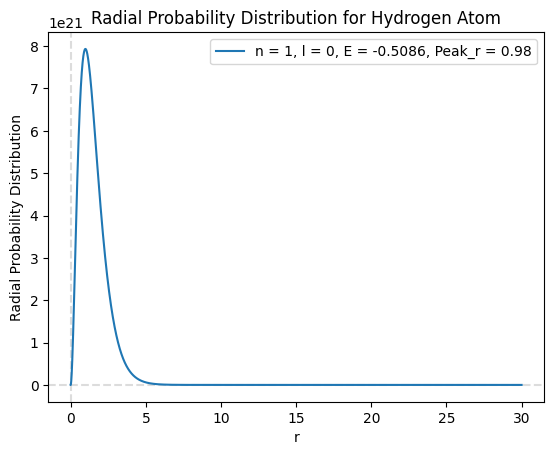

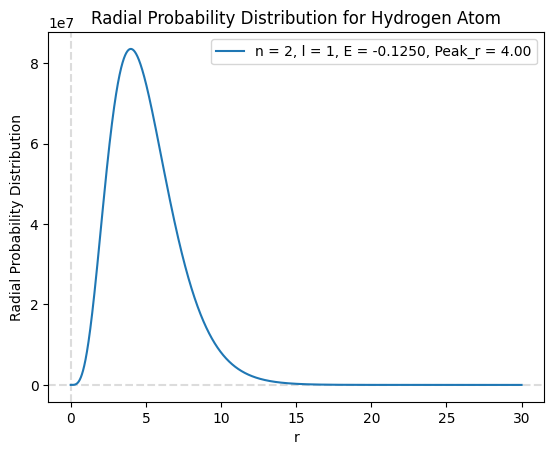

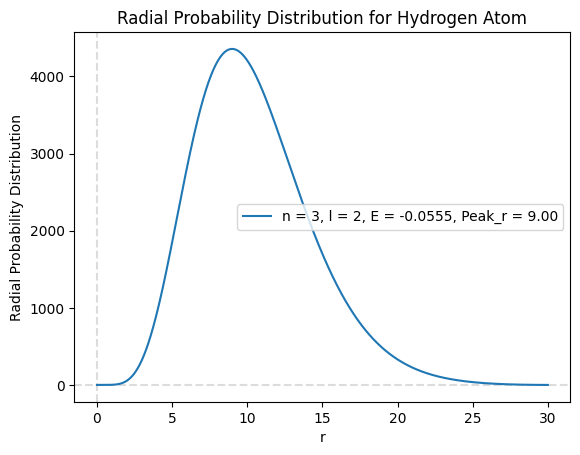

In [82]:
# Define the quantum numbers n and l
n_values = [1, 2, 3]
l_values = [0, 1, 2]

# Main loop to find eigenvalues and plot wave functions
for n in n_values:
    for l in l_values:
        if n - l == 1:  # Condition for hydrogen atom
            V = lambda x: Veff(x, l)  # Define the potential function
            jc = []
            En = []
            for E in np.arange(-1, 0, .01):  # Iterate over a range of energies
                En.append(E)
                jc.append(juncCondn(E))  # Apply the junction condition
            
            jc = np.asarray(jc)
            En = np.asarray(En)
            idx = np.where(jc[:-1] * jc[1:] < 0)[0] + 1  # Find indices where the junction condition changes sign
            EigValues = np.zeros(len(idx))
             
            # Iterate over found indices to refine eigenvalues
            for j in range(len(idx)):
                a = En[idx[j]-1]
                b = En[idx[j]+1]
                # Use bisection method to find eigenvalue within the interval
                EigValues[j] = bisect(lambda E: juncCondn(E), a, b)
                
                # Plotting after collecting data
                xL, xR, xm, dx = 1e-6, 30, 1e-3, 1./200
                x1, wfup, x2, wfdn = solveTISE(EigValues[j], xL, xR, xm, dx, Veff)
                x = np.hstack((x1[:-1], np.flipud(x2[:-2])))
                psi = np.hstack((wfup[:-1], (-1)**(j+1) * np.flipud(wfdn[:-2])))
                
                # Count the number of nodes
                num_nodes = 0
                for i in range(1, len(psi)):
                    if psi[i-1] * psi[i] < 0:
                        num_nodes += 1
                
                # Check if the number of nodes is equal to 0
                if num_nodes == 0:
                    # Radial probability distribution analysis
                    radial_prob = psi**2   # x**2, x=1
                    peak_r = x[np.argmax(radial_prob)]  # Finding the peak position
                    
                    # Plotting the square of the wave function
                    plt.axhline(0, ls='--', c='gainsboro')
                    plt.axvline(0, ls='--', c='gainsboro')

                    plt.plot(x, radial_prob, label='n = %d, l = %d, E = %.4f, Peak_r = %.2f'%(n, l, EigValues[j], peak_r))
                    plt.legend()
                    plt.xlabel('r')
                    plt.ylabel('Radial Probability Distribution')
                    plt.title('Radial Probability Distribution for Hydrogen Atom')
                    plt.show()
                    


## Demonstrate that the size of the Hydrogen atom scales as $ n^2$. Describe the approach.
 
According to Bohr's second postulate $mvr=\frac{nh}{2\pi}$\
where m be the mass of an electron, v be the velocity and r be the radius of the orbit in which the electron revolves around the nucleus.\
So, $v=\frac{nh}{2\pi mr}$

Here, the centripetal force is provided by the electrostatic force of attarction between elctron and nucleus.
So, $\frac{mv^2}{r} = \frac{ke^2}{r^2}$\
$$ r= \frac{kZe^2}{mv^2}$$

Substituting the value of v, we get
$$ r=\frac{n^2h^2}{4\pi^2 mke^2}$$

Here we see that $r\propto n^2$

We know the the size of the atom depend on the radius of the orbit. As r is proportional to the $n^2 $ then the size of the Hydrogen atom also proportional to $n^2$.


### From the above code
We see that when $l$=$l_{max}$= n-1, there is a single peak centered at r= $n^2$.[where for a given n the maximum value of l is $l_{max}$ = n-1.\]

For example, for 1s state anlytically peak should be arise at r=$1^2$= 1, from code it is at r = 0.98 \
for 2p state analytically peak should be arise at r=$2^2$= 4, from code it is at r = 4.00\
for 3d state analytically peak should be arise at at r=$3^2$= 9, from code it is at r = 9.00

Peak of the wavefunction represents the high value of probability distribution. Higher probability density means higher probability of electron being there. Atomic size depends on the position of the electron. Therefore we can say that the size of the atom scales as $n^2$.

## How many bound states does Hydrogen atom have ?
A bound state refers to the combination of two or more fundamental building blocks, like particles, atoms, or bodies, that act as a unified entity and require energy to separate them. A  bound state can be defined as a state where the interaction energy between the particles surpasses the total energy of each individual particle. Consequently, if the potential diminishes towards infinity, bound states must have negative-energy states. 
Hydrogen atom has potential $V(r) = \frac{-1}{r}$ which approaches to zero at infinity . So all states having negetive energy are bound states for Hydrogen atom . There are infinite number of values of energy that are negetive . And thus number of bound states for Hydrogen atom are infinite .

# Plotting the probability density distribution |$ u_{nl}Y_{lm}$|$^2$ in x-z plane for the circular state (n,l) = (4,3)

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

In [84]:
# Define parameters
n = 4  # Principal quantum number
l = 3  # Angular momentum quantum number
m_values = [0, 1, 2, 3]  # Magnetic quantum number values


In [85]:
# Generate meshgrid for angles
x = np.linspace(-1, 1, 100)
z = np.linspace(-1, 1, 100)
x, z = np.meshgrid(x, z)  # Generate meshgrid for the z-x plane


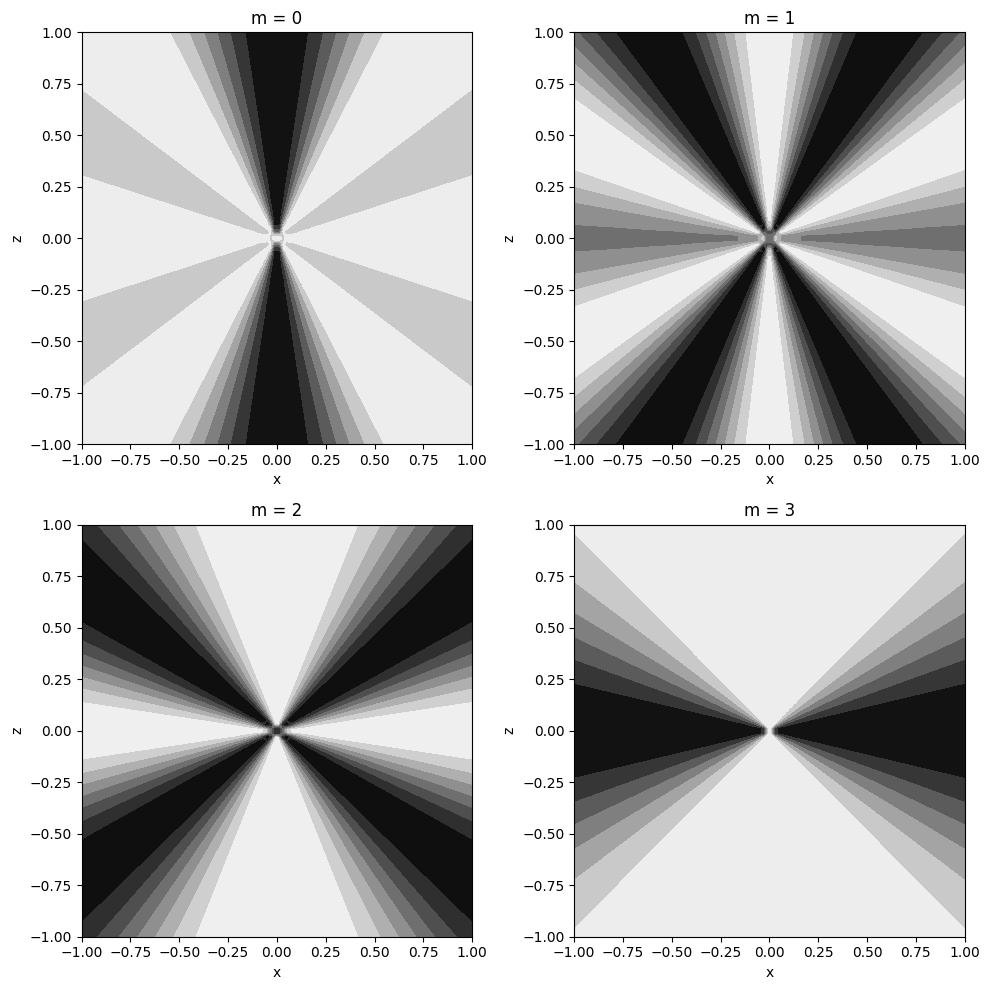

In [87]:
# Initialize figure
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot probability density distribution for each m value
for i, m in enumerate(m_values):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Compute spherical harmonics for the given m value
    Y_lm = sph_harm(m, l, 0, np.arctan2(x, z))  # Use arctan2 to get correct theta angle
    
    # Calculate probability density |u_nl * Y_lm|^2
    # Note: Replace this with your specific calculation based on your wavefunction
    # Here, we'll use a placeholder function
    probability_density = np.abs(Y_lm)**2  # Placeholder
    
    # Plot probability density distribution
    ax.contourf(x, z, probability_density, cmap='binary')
    ax.set_title(f'm = {m}')
    ax.set_xlabel('x')
    ax.set_ylabel('z')

# Adjust layout
plt.tight_layout()
plt.show()


## YUKAWA POTENTIAL

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import bisect

In [7]:
# Constants
xL, xR, N = 0., 120., 2200  # Left and right boundaries, number of steps
h, mass = (xR-xL)/N, 1.0  # Step size, mass
Lmax, EL, M = 4, [], 100  # Maximum orbital quantum number, empty list for energies, matching point
Estart, dE = -0.5/np.arange(1, Lmax+1)**2-0.1, 0.001  # Initial energies, energy step
Z = [1, 2]  # Charge values

## Plotting of energy-level

In [8]:
def Veff(r, Z):
    """Effective potential function"""
    a = 20
    return (L*(L+1)/(2*mass*r*r))-(Z*np.exp(-r/a))/(r)

def f(r, Z):
    """Function for shooting method"""
    return 2*mass*(E-Veff(r, Z))

In [9]:
def numerov(f, u, n, x, h, Z):
    """Numerov method for solving differential equation"""
    nodes, c = 0, h*h/12.
    f0, f1 = 0., f(x+h, Z)
    for i in range(n):
        x += h
        f2 = f(x+h, Z)
        u.append((2*(1-5*c*f1)*u[i+1] - (1+c*f0)*u[i])/(1+c*f2))
        f0, f1 = f1, f2
        if (u[-1]*u[-2] < 0.0): nodes += 1
    return u, nodes

def shoot(En, epsilon):
    """Shooting method for finding eigenvalues"""
    global E
    E, c, xm = En, (h*h)/6., xL + M*h
    wfup, nup = numerov(f, [0,.1], M, xL, h, Z)
    wfdn, ndn = numerov(f, [0,.1], N-M, xR, -h, Z)
    dup = ((1+c*f(xm+h, Z))*wfup[-1] - (1+c*f(xm-h,Z))*wfup[-3])/(h+h)
    ddn = ((1+c*f(xm+h, Z))*wfdn[-3] - (1+c*f(xm-h,Z))*wfdn[-1])/(h+h)
    return dup*wfdn[-2] - wfup[-2]*ddn

Z, n , l, nodes, E,= 1 1 0 0 -0.45088419342041
Z, n , l, nodes, E,= 1 2 0 1 -0.08165996551513624
Z, n , l, nodes, E,= 1 3 0 2 -0.019325080871581492
Z, n , l, nodes, E,= 1 4 0 3 -0.003084739685058046
Z, n , l, nodes, E,= 1 2 1 0 -0.08074083709716785
Z, n , l, nodes, E,= 1 3 1 1 -0.018557884216308416
Z, n , l, nodes, E,= 1 3 2 0 -0.016915563795301528
Z, n , l, nodes, E,= 2 1 0 1 -0.4053652420043944
Z, n , l, nodes, E,= 2 2 0 2 -0.13682758331298786
Z, n , l, nodes, E,= 2 3 0 3 -0.049829933166503394
Z, n , l, nodes, E,= 2 4 0 4 -0.01602960968017524
Z, n , l, nodes, E,= 2 5 0 5 -0.003240318298339296
Z, n , l, nodes, E,= 2 2 1 1 -0.13632065582275382
Z, n , l, nodes, E,= 2 3 1 2 -0.0491792373657225
Z, n , l, nodes, E,= 2 4 1 3 -0.015463981628417788
Z, n , l, nodes, E,= 2 3 2 0 -0.1342924864027235
Z, n , l, nodes, E,= 2 4 2 1 -0.04748180219862186
Z, n , l, nodes, E,= 2 5 2 2 -0.014162573072645276
Z, n , l, nodes, E,= 2 4 3 0 -0.04487284088134758
Z, n , l, nodes, E,= 2 5 3 1 -0.0121465530395506

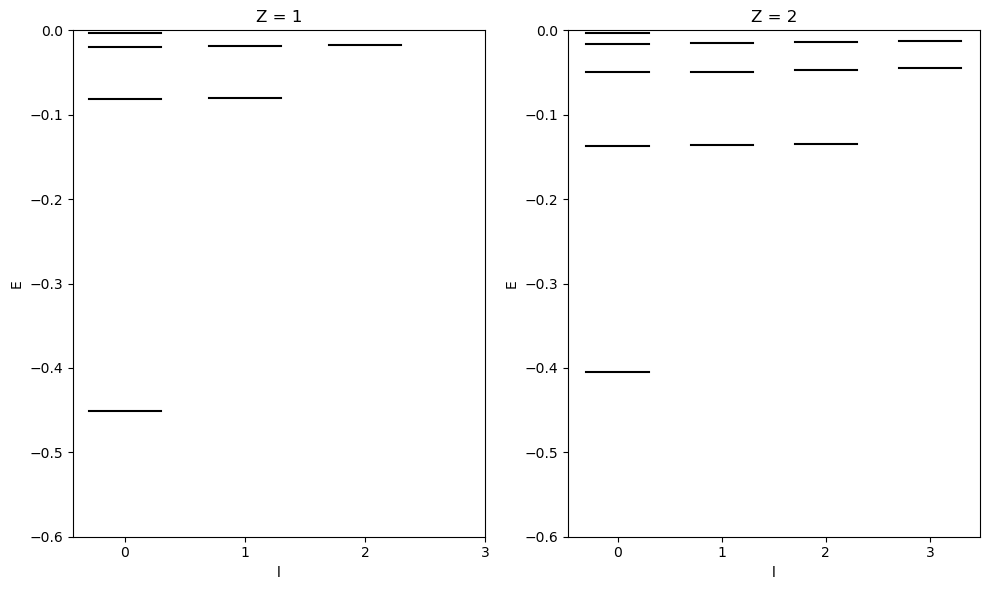

In [10]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # 1 row, 2 columns for subplots

axs = axs.flatten()  # Flatten the array for easy indexing

for idx, Z in enumerate(Z):
    EL = []  # Empty list for energies
    for L in range(Lmax):
        n, E1, Ea = L+1, Estart[L], []  # Quantum number, initial energy, empty list for found energies
        while (E1 < -4*dE):
            E1 += dE
            if (shoot(E1, Z)*shoot(E1 + dE, Z) > 0): continue  # Continue if same sign
            E = bisect(shoot, E1, E1 + dE, xtol=1.e-8, args=(Z,))  # Use bisection method to find root
            Ea.append(E)
            wfup, nup = numerov(f, [0,.1], M-1, xL, h, Z)  # Solve wavefunction
            wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h, Z)
            psix = np.concatenate((wfup[:-1], wfdn[::-1]))
            print('Z, n , l, nodes, E,=', Z, n, L , nup+ndn, E)
            psix[M:] *= wfup[-1]/wfdn[-1]
            n += 1
        EL.append(Ea)

    for L in range(Lmax):
        for i in range(len(EL[L])):
            axs[idx].plot([L-.3, L+.3], [EL[L][i]]*2, 'k-')  # Plot energy levels
    axs[idx].set_title(f'Z = {Z}')  # Set subplot title
    axs[idx].set_xlabel('l')  # Set x-axis label
    axs[idx].set_ylabel('E')  # Set y-axis label
    axs[idx].set_ylim(-0.6, 0)  # Set y-axis limits
    axs[idx].set_xticks(range(Lmax))  # Set x-ticks

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

## Find the energy difference between 2s and 2p states. Is the number of bound states finite for the Yukawa potential? Double Z = 2, and repeat the calculation. Compare with Z=1 state

From the above code

For Z=1

Energy of 2s state =  -0.08165996551513624

Energy of 2p state =  -0.08074083709716785

### Energy diffrence =   0.0009191284179

When $\alpha$ tends to  0 Yukawa potential resembles to columb potential.  When α is not equal to zero, the Yukawa potential exhibits distinct characteristics compared to the Coulomb potential. It is anticipated that the presence of screening in the interactions will restrict the number of bound states. However, if α is significantly large, it is expected that the bound states will vanish.
### For the Yukawa potential the number of bound states is finite.

For Z=2

Energy of 2s state = -0.13682758331298786

Energy of 2p state = -0.13632065582275382

### Energy difference = 0.0005069274902

Comparing with energy difference of Z=1 , 

(Energy difference between 2s and 2p for Z=1) - (Energy difference bwtween 2s and 2p for Z=2 ) 

= (-0.0009191284179) -(- 0.0005069274902)

= - 0.00041220009817

It shows that 2s and 2p levels for Z=1 are more splitted compared to Z=2.

## Calculation of expectation value of kinetic energy and potential energy

## Yukawa potential

In [7]:
E_vals = []
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import bisect

# Energy values for different states
E_vals = [-0.45088419342041 , -0.08165996551513624 , -0.08074083709716785 ,  -0.016915563795301528 ]


def Veff(r, Z):
    """Effective potential function"""
    a = 20
    return (L*(L+1)/(2*mass*r*r))-(Z*np.exp(-r/a))/(r)

# Corresponding orbital angular momentum quantum numbers
L_vals = [0 ,0 ,0,1,1,2]

def Veff(r, L, mass):
    """Effective potential"""
    return (L*(L+1))/(2*mass*r*r) - 1/r

def f(r, E, L, mass=1):
    """Schrodinger equation in Numerov form"""
    return 2 * (E - Veff(r, L, mass))

def numerov(f, u, n, x, h, E, L):
    """Numerov integrator for u'' + f(x)u = 0"""
    nodes, c = 0, h * h / 12.0
    f0, f1 = 0.0, f(x + h, E, L)
    
    for i in range(n):
        x += h
        f2 = f(x + h, E, L)
        u.append((2*(1 - 5*c*f1)*u[i+1] - (1 + c*f0)*u[i]) / (1 + c*f2))
        
        f0, f1 = f1, f2
        if u[-1] * u[-2] < 0.0:
            nodes += 1
            
    return u, nodes

# Define parameters and constants
xL, xR, N = 0.01, 30, 2200  # limits, intervals
h, mass = (xR - xL) / N, 1.0  # step size, mass
Lmax, EL, M = 4, [], 1 # M = matching point

x1 = np.linspace(xL, xR , N)

# Labels for different orbitals
orbital_labels = ['1s', '2s', '3s', '2p', '3p']

# Loop over each energy value and its corresponding orbital angular momentum
for j, E in enumerate(E_vals):
    L = L_vals[j]  # Retrieve the corresponding L value for the current energy
    orbital_label = orbital_labels[j]  # Retrieve the corresponding orbital label

    v = []
    
    # Calculate wavefunction on the left side
    wfup, nup = numerov(f, [0, 0.1], M - 1, xL, h, E, L)
    # Calculate wavefunction on the right side
    wfdn, ndn = numerov(f, [0, 0.1], N - M - 1, xR, -h, E, L)

    # Concatenate the wavefunctions and flip the right side to match with the left side
    psi = np.hstack((wfup[:-1], np.flipud(wfdn[:-1])))
    psix = np.hstack((wfup[:], np.flipud(wfdn[:-1])))

    print(len(psi), len(x1))
    
    # Differentiate to obtain potential term
    c = h * h / 6
    for i in range(len(psix)-1):
        v.append(((1 + c * f(x1[i] + h, E, L)) * psix[i+1] - (1 + c * f(x1[i] - h, E, L)) * psix[i-1]) /(h+h))

    c = h*h/12
    v.append((2*(1 - 5*c*f(x1[-1] + h, E, L))*v[-1] - (1 + c*f(x1[-1] + h, E, L))*v[-2]) / (1 + c*f(x1[-1] + h, E, L)))

    vv =[]
    c = h * h / 6
    for i in range(len(v)-1):
        vv.append(((1 + c * f(x1[i] + h, E, L)) * v[i+1] - (1 + c * f(x1[i] - h, E, L)) * v[i-1]) /(h+h))

    # Ensure that the potential energy term does not result in division by zero
    
    potential_term = (L*(L+1)/(2*mass*x1) - 1) / (x1)
    V = np.dot(psi/np.linalg.norm(psi),Veff(x1, L, mass)* psi/np.linalg.norm(psi))

    # Compute the expectation value of kinetic energy
    T = -0.5*np.dot(psi,vv)/np.dot(psi, psi)
    print(np.dot(psi, psi))    
    print(f"For E = {E}, L = {L}, <T> = {T}, <V> = {V}")


2200 2200
1.455424590096907e+24
For E = -0.45088419342041, L = 0, <T> = 0.40194410653444834, <V> = -0.8792455848002191
2200 2200
1741256068.225321
For E = -0.08165996551513624, L = 0, <T> = 0.1578600924853154, <V> = -0.16842932545876632
2200 2200
1521098646.3940132
For E = -0.08074083709716785, L = 0, <T> = 0.1579086623879176, <V> = -0.16747360315230164
2200 2200
1171267.2683449695
For E = -0.016915563795301528, L = 1, <T> = 7.627208009704355, <V> = 51.15349454537165


## Hydrogen atom

In [5]:
E_vals = []
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import bisect


# Energy values for different states
E_vals = [-0.4820917282104491 , -0.1227285537719722 , -0.054877754211425274,-0.12499996185302725, -0.055554756164550634 ]

# Corresponding orbital angular momentum quantum numbers
L_vals = [0 ,0 ,0,1,1]

def Veff(r, L, mass):
    """Effective potential"""
    return (L*(L+1))/(2*mass*r*r) - 1/r

def f(r, E, L, mass=1):
    """Schrodinger equation in Numerov form"""
    return 2 * (E - Veff(r, L, mass))

def numerov(f, u, n, x, h, E, L):
    """Numerov integrator for u'' + f(x)u = 0"""
    nodes, c = 0, h * h / 12.0
    f0, f1 = 0.0, f(x + h, E, L)
    
    for i in range(n):
        x += h
        f2 = f(x + h, E, L)
        u.append((2*(1 - 5*c*f1)*u[i+1] - (1 + c*f0)*u[i]) / (1 + c*f2))
        
        f0, f1 = f1, f2
        if u[-1] * u[-2] < 0.0:
            nodes += 1
            
    return u, nodes

# Define parameters and constants
xL, xR, N = 0.01, 30, 2200  # limits, intervals
h, mass = (xR - xL) / N, 1.0  # step size, mass
Lmax, EL, M = 4, [], 1 # M = matching point

x1 = np.linspace(xL, xR , N)

# Labels for different orbitals
orbital_labels = ['1s', '2s', '3s', '2p', '3p']

# Loop over each energy value and its corresponding orbital angular momentum
for j, E in enumerate(E_vals):
    L = L_vals[j]  # Retrieve the corresponding L value for the current energy
    orbital_label = orbital_labels[j]  # Retrieve the corresponding orbital label

    v = []
    
    # Calculate wavefunction on the left side
    wfup, nup = numerov(f, [0, 0.1], M - 1, xL, h, E, L)
    # Calculate wavefunction on the right side
    wfdn, ndn = numerov(f, [0, 0.1], N - M - 1, xR, -h, E, L)

    # Concatenate the wavefunctions and flip the right side to match with the left side
    psi = np.hstack((wfup[:-1], np.flipud(wfdn[:-1])))
    psix = np.hstack((wfup[:], np.flipud(wfdn[:-1])))

    print(len(psi), len(x1))
    
    # Differentiate to obtain potential term
    c = h * h / 6
    for i in range(len(psix)-1):
        v.append(((1 + c * f(x1[i] + h, E, L)) * psix[i+1] - (1 + c * f(x1[i] - h, E, L)) * psix[i-1]) /(h+h))

    c = h*h/12
    v.append((2*(1 - 5*c*f(x1[-1] + h, E, L))*v[-1] - (1 + c*f(x1[-1] + h, E, L))*v[-2]) / (1 + c*f(x1[-1] + h, E, L)))

    vv =[]
    c = h * h / 6
    for i in range(len(v)-1):
        vv.append(((1 + c * f(x1[i] + h, E, L)) * v[i+1] - (1 + c * f(x1[i] - h, E, L)) * v[i-1]) /(h+h))

    # Ensure that the potential energy term does not result in division by zero
    
    potential_term = (L*(L+1)/(2*mass*x1) - 1) / (x1)
    V = np.dot(psi/np.linalg.norm(psi),Veff(x1, L, mass)* psi/np.linalg.norm(psi))

    # Compute the expectation value of kinetic energy
    T = -0.5*np.dot(psi,vv)/np.dot(psi, psi)
    print(np.dot(psi, psi))    
    print(f"For E = {E}, L = {L}, <T> = {T}, <V> = {V}")


2200 2200
1.0899408842584554e+25
For E = -0.4820917282104491, L = 0, <T> = 0.4653999510461967, <V> = -0.9705205103018781
2200 2200
489517518674.75024
For E = -0.1227285537719722, L = 0, <T> = 0.12057043142894222, <V> = -0.24621213697082556
2200 2200
32868779.14925776
For E = -0.054877754211425274, L = 0, <T> = 0.056255563983383085, <V> = -0.11191868207614247
2200 2200
1686114400805.291
For E = -0.12499996185302725, L = 1, <T> = 0.04166176775526991, <V> = -0.16661412571912565
2200 2200
55128852.46917443
For E = -0.055554756164550634, L = 1, <T> = 0.03209191413884042, <V> = -0.08132296191155192


## For Yukawa potential given above , compute < T> and < V> for the lowest state in each l series . Do they still obey virial theorem . Comment on your results.

The virial theorem is $$ <T> =-\frac{1}{2} <V>$$
From the above code we see that the expectation value of kinetic energy and potential energy of hydrogen atom and Yukawa potential for $ l=0\space and\space 1 $ 

### Virial theorem is followed for all states of Hydrogen atom whereas for Yukawa potential the theorem is obeyed for only lower energy states such as 1s , 2s and 3s.